In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame(
    data = [[40, 60, 80, 100, 140, 170, 0], [425, 250, 180, 150, 106, 90, 0], [0.37, 0.347, 0.336, 0.331, 0.315, 0.314, 0.374], [0.381, 0.387, 0.364, 0.338, 0.318, 0.323, 0.375]]
    )
data = data.T
data = data.rename(columns = {0:"Number", 1:"Screen Size", 2: "Mo", 3:"Mf"})
data['mass'] = data['Mf'] - data['Mo']
total_mass = data['mass'].sum()
data['Xi'] = data['mass'] / total_mass
data['Di'] = [425, (425+250)/2, (250+280)/2, (180+150)/2, (150+106)/2, (106+90)/2, 90/2]
data

,Number,Screen Size,Mo,Mf,mass,Xi,Di
0,40.0,425.0,0.370,0.381,0.011,0.111111,425.0
1,60.0,250.0,0.347,0.387,0.040,0.404040,337.5
2,80.0,180.0,0.336,0.364,0.028,0.282828,265.0
3,100.0,150.0,0.331,0.338,0.007,0.070707,165.0
4,140.0,106.0,0.315,0.318,0.003,0.030303,128.0
5,170.0,90.0,0.314,0.323,0.009,0.090909,98.0
6,0.0,0.0,0.374,0.375,0.001,0.010101,45.0


In [26]:
data.to_csv("./data.csv")

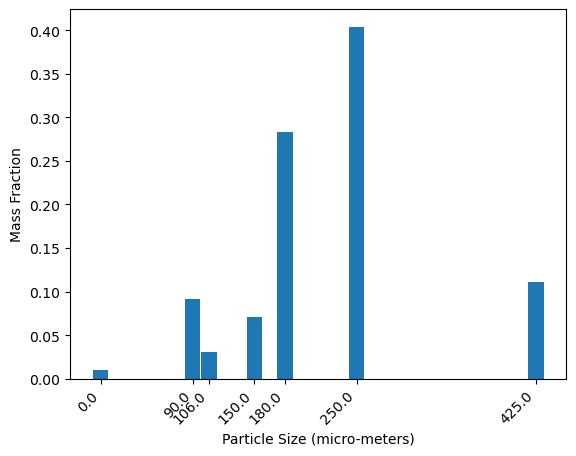

In [4]:
plt.bar(data['Screen Size'], data['Xi'], width = 15, tick_label=data['Screen Size'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Particle Size (micro-meters)")
plt.ylabel("Mass Fraction")
plt.show()

In [14]:
edg = pd.DataFrame([600])
edg = pd.concat([edg, data["Screen Size"]], ignore_index=True)
edg



,0
0,600.0
1,425.0
2,250.0
3,180.0
4,150.0
5,106.0
6,90.0
7,0.0


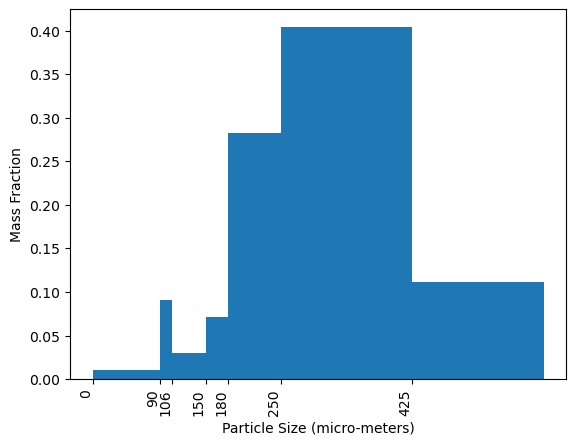

In [25]:
plt.stairs(data["Xi"], edg[0], fill=True)
plt.xlabel("Particle Size (micro-meters)")
plt.ylabel("Mass Fraction")
plt.xticks(data["Screen Size"], rotation=90, ha='right', fontsize=10)
plt.show()

In [5]:
# mean particle distirbution 
denom = 0 
for i in range(len(data)):
    x = data.loc[i, 'Xi']
    d = data.loc[i, 'Di']
    denom = denom + (x/d)

Dp = 1/denom
print(f'The mean particle distribution is {Dp} micrometers')

The mean particle distribution is 230.24222394448105 micrometers
